In [1]:
import pandas as pd


In [32]:
results = pd.read_csv("sft_vs_dpo_first_50.csv")
results

,text,true_label,sft_prediction,sft_confidence,sft_response,dpo_prediction,dpo_confidence,dpo_response
0,Because the judges President Bush nominates ar...,notsarc,Yes,100.00,Yes,Yes,100.00,Yes.
1,You're as loony as she is. But then you're a b...,sarc,Yes,100.00,Yes,Yes,100.00,Yes. It's like trying to talk about something ...
2,Being refuted by organized groups with an agen...,notsarc,No,100.00,No.,No,100.00,No. The text appears to be a response to a com...
3,"Well, there's plenty of scientific evidence ab...",notsarc,No,100.00,No. The text does not seem to be expressing an...,No,100.00,No. The text does not contain any sarcasm. It ...
4,Well then this doesn't answer my question.If y...,notsarc,No,100.00,No.,No,100.00,No. The text does not suggest that the cost of...
5,Do you see the other cities pushing for outrag...,notsarc,Yes,73.54,Yes,Yes,100.00,Yes.
6,Obviously because they're not chickens yet XD ...,sarc,Yes,100.00,Yes,Yes,100.00,Yes. It's funny how even humans can be so inco...
7,You are incorrect when it comes to the age of ...,notsarc,No,100.00,No,No,100.00,No. The text does not contain any sarcasm. It ...
8,LOL no kidding. If you took all the nut jobs o...,sarc,Yes,100.00,Yes,Yes,100.00,Yes\n\n
9,But you are smart enough to realize that the b...,notsarc,No,56.88,No. The ban is not related to the topic at hand.,No,66.45,"No. The text is not sarcastic; rather, it's ex..."


In [33]:
results.describe()


,sft_confidence,dpo_confidence
count,50.000000,50.000000
mean,84.844400,83.619400
std,22.693154,22.440095
min,24.730000,30.690000
25%,71.330000,67.425000
50%,100.000000,100.000000
75%,100.000000,100.000000
max,100.000000,100.000000


In [ ]:
# Filter by different prediction patterns
notsarc_sft_wrong_dpo_right = results[(results['true_label'] == 'notsarc') & (results['sft_prediction'] == 'Yes') & (results['dpo_prediction'] == 'No')]
notsarc_sft_right_dpo_wrong = results[(results['true_label'] == 'notsarc') & (results['sft_prediction'] == 'No') & (results['dpo_prediction'] == 'Yes')]
sarc_sft_wrong_dpo_right = results[(results['true_label'] == 'sarc') & (results['sft_prediction'] == 'No') & (results['dpo_prediction'] == 'Yes')]
sarc_sft_right_dpo_wrong = results[(results['true_label'] == 'sarc') & (results['sft_prediction'] == 'Yes') & (results['dpo_prediction'] == 'No')]

print(f"DPO fixed SFT false positive: {len(notsarc_sft_wrong_dpo_right)}")
print(f"SFT correct, DPO false positive: {len(notsarc_sft_right_dpo_wrong)}")
print(f"DPO caught sarcasm, SFT missed: {len(sarc_sft_wrong_dpo_right)}")
print(f"SFT caught sarcasm, DPO missed: {len(sarc_sft_right_dpo_wrong)}")

DPO fixed SFT false positive: 1
SFT correct, DPO false positive: 2
DPO caught sarcasm, SFT missed: 3
SFT caught sarcasm, DPO missed: 1


In [43]:
pd.set_option("display.max_colwidth", None)
sarc_sft_right_dpo_wrong
# notsarc_sft_right_dpo_wrong['text']

,text,true_label,sft_prediction,sft_confidence,sft_response,dpo_prediction,dpo_confidence,dpo_response
48,"You mean I can get pregnant all by myself! COOL! Out with the men. They have been ticking me off for YEARS! Well, where should we draw the line with men? At what point is it OK for the government to take control rather than letting men make choices for their bodies? For me. Nothing less than I ALWAYS MAKE MY OWN CHOICES FOR MY BODY is acceptable and anything else is violation.",sarc,Yes,72.23,Yes.,No,35.93,"No. The text is not sarcastic. It's just stating the obvious. The speaker believes that women have more control over their own bodies and that they should be allowed to make decisions about them. However, there's no evidence in the text to"


In [35]:
# View examples
for name, df in [("DPO fixed SFT false pos", notsarc_sft_wrong_dpo_right), 
                  ("SFT correct, DPO false pos", notsarc_sft_right_dpo_wrong),
                  ("DPO caught, SFT missed", sarc_sft_wrong_dpo_right),
                  ("SFT caught, DPO missed", sarc_sft_right_dpo_wrong)]:
    if len(df) > 0:
        print(f"\n{name}:")
        for _, row in df.iterrows():
            print(f"  {row['text'][:80]}... | SFT:{row['sft_prediction']}({row['sft_confidence']}%) DPO:{row['dpo_prediction']}({row['dpo_confidence']}%)")


DPO fixed SFT false pos:
  But behind that are deeper, more fundamental issues about what homosexuality IS ... | SFT:Yes(24.73%) DPO:No(71.29%)

SFT correct, DPO false pos:
  We can add to this list, Singin's desire of criminalizing gun owners who don't r... | SFT:No(71.03%) DPO:Yes(30.69%)
  You answered the first one already... it is a 'cartoon'. It showed that just as ... | SFT:No(100.0%) DPO:Yes(31.74%)

DPO caught, SFT missed:
  The last known passenger pigeon died in 1914. Your attempt to inflame the discus... | SFT:No(50.27%) DPO:Yes(55.59%)
  No, quite clearly you are wrong, he is saying Countless people, facing persecuti... | SFT:No(55.51%) DPO:Yes(66.03%)
  The Archbishop of York has a screw loose too on that subject.... | SFT:No(42.93%) DPO:Yes(62.98%)

SFT caught, DPO missed:
  You mean I can get pregnant all by myself! COOL! Out with the men. They have bee... | SFT:Yes(72.23%) DPO:No(35.93%)


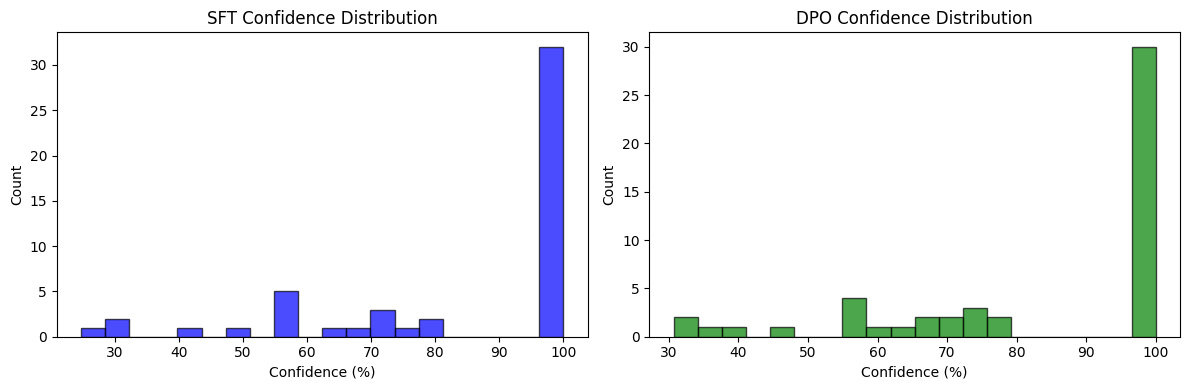

In [36]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# SFT confidence distribution
axes[0].hist(results['sft_confidence'], bins=20, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('SFT Confidence Distribution')
axes[0].set_xlabel('Confidence (%)')
axes[0].set_ylabel('Count')

# DPO confidence distribution
axes[1].hist(results['dpo_confidence'], bins=20, alpha=0.7, color='green', edgecolor='black')
axes[1].set_title('DPO Confidence Distribution')
axes[1].set_xlabel('Confidence (%)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

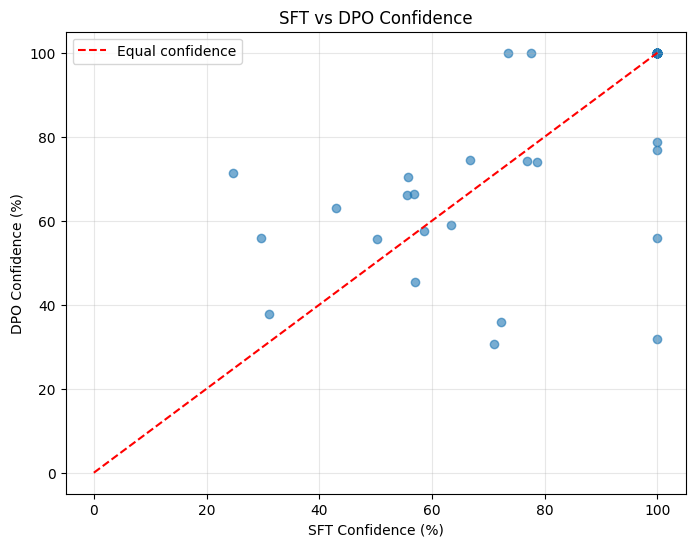

In [37]:
# Scatter plot: SFT vs DPO confidence
plt.figure(figsize=(8, 6))
plt.scatter(results['sft_confidence'], results['dpo_confidence'], alpha=0.6)
plt.plot([0, 100], [0, 100], 'r--', label='Equal confidence')
plt.xlabel('SFT Confidence (%)')
plt.ylabel('DPO Confidence (%)')
plt.title('SFT vs DPO Confidence')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()